In [45]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
words = (open('./names.txt', 'r').read().splitlines())
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [47]:
len(words)

32033

In [48]:
# build the vocabulary
chars = sorted(list(set(''.join(words))))
stoi = {char: i+1 for i, char in enumerate(chars)}
stoi['.'] = 0
itos = {i: char for char, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [49]:
block_size = 3
X, Y = [], []
for word in words[:5]:
    context = [0]*block_size
    print(word)
    for chr in word + '.':
        ix = stoi[chr]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '-->', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
... --> e
..e --> m
.em --> m
emm --> a
mma --> .
olivia
... --> o
..o --> l
.ol --> i
oli --> v
liv --> i
ivi --> a
via --> .
ava
... --> a
..a --> v
.av --> a
ava --> .
isabella
... --> i
..i --> s
.is --> a
isa --> b
sab --> e
abe --> l
bel --> l
ell --> a
lla --> .
sophia
... --> s
..s --> o
.so --> p
sop --> h
oph --> i
phi --> a
hia --> .


In [50]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [51]:
C = torch.randn((27,2)) # we have chosen 2-d space randomly that's why we 27x2

In [52]:
C[5]

tensor([0.9018, 0.5128])

In [53]:
# DISCARDED: as indexing faster
F.one_hot(torch.tensor(5), num_classes=27).float() @ C # requires torch.tensor

tensor([0.9018, 0.5128])

We can think as linear neurons with weight matrix C, encoding into one_hot OR we can index

In [54]:
C[torch.tensor([5,5,6,7])] # we can do this

tensor([[ 0.9018,  0.5128],
        [ 0.9018,  0.5128],
        [-0.9270,  0.7554],
        [ 0.9282, -0.5344]])

In [55]:
C[X] # 32 x 3 x 2, we have retrieved embedding vector
# for each of those 32 x 3 we have retrieved the embedding matrix

tensor([[[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.9018,  0.5128]],

        [[-1.5406, -0.5328],
         [ 0.9018,  0.5128],
         [ 0.3525,  1.7315]],

        [[ 0.9018,  0.5128],
         [ 0.3525,  1.7315],
         [ 0.3525,  1.7315]],

        [[ 0.3525,  1.7315],
         [ 0.3525,  1.7315],
         [-1.0677,  0.2511]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.0667,  1.7186]],

        [[-1.5406, -0.5328],
         [ 0.0667,  1.7186],
         [-0.8653,  1.7636]],

        [[ 0.0667,  1.7186],
         [-0.8653,  1.7636],
         [-1.0098, -0.5942]],

        [[-0.8653,  1.7636],
         [-1.0098, -0.5942],
         [-0.3245, -0.0467]],

        [[-1.0098, -0.5942],
         [-0.3245, -0.0467],
         [-1.0098, -0.5942]],

        [[-0.3245, -0

In [56]:
X[13,2]

tensor(1)

In [57]:
C[X[13,2]] == C[1]

tensor([True, True])

In [58]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [59]:
# hidden layer
W1 = torch.randn((6, 100)) # 6 as and 100 arbitrary
b1 = torch.randn(100)

In [60]:
# enc @ W1 + b1 will NOT work as 32 x 3 x 2 cannot be multiplied by 6 x 100
# we want enc to be 32 x 3 x 2
# we use torch.cat
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) # we did it wrt dim 1 and not dim 0
# all the 3 (block_size) lists for a single char with two elements (2-d space) has been concatenated

tensor([[-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328,  0.9018,  0.5128],
        [-1.5406, -0.5328,  0.9018,  0.5128,  0.3525,  1.7315],
        [ 0.9018,  0.5128,  0.3525,  1.7315,  0.3525,  1.7315],
        [ 0.3525,  1.7315,  0.3525,  1.7315, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328,  0.0667,  1.7186],
        [-1.5406, -0.5328,  0.0667,  1.7186, -0.8653,  1.7636],
        [ 0.0667,  1.7186, -0.8653,  1.7636, -1.0098, -0.5942],
        [-0.8653,  1.7636, -1.0098, -0.5942, -0.3245, -0.0467],
        [-1.0098, -0.5942, -0.3245, -0.0467, -1.0098, -0.5942],
        [-0.3245, -0.0467, -1.0098, -0.5942, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.0677,  0.2511, -0.3245, -0.0467],
        [-1.0677,  0.2511, -0.3245, -0.0

In [61]:
emb

tensor([[[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.9018,  0.5128]],

        [[-1.5406, -0.5328],
         [ 0.9018,  0.5128],
         [ 0.3525,  1.7315]],

        [[ 0.9018,  0.5128],
         [ 0.3525,  1.7315],
         [ 0.3525,  1.7315]],

        [[ 0.3525,  1.7315],
         [ 0.3525,  1.7315],
         [-1.0677,  0.2511]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328]],

        [[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.0667,  1.7186]],

        [[-1.5406, -0.5328],
         [ 0.0667,  1.7186],
         [-0.8653,  1.7636]],

        [[ 0.0667,  1.7186],
         [-0.8653,  1.7636],
         [-1.0098, -0.5942]],

        [[-0.8653,  1.7636],
         [-1.0098, -0.5942],
         [-0.3245, -0.0467]],

        [[-1.0098, -0.5942],
         [-0.3245, -0.0467],
         [-1.0098, -0.5942]],

        [[-0.3245, -0

In [62]:
torch.unbind(emb, 1) # equal as before

(tensor([[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.9018,  0.5128],
         [ 0.3525,  1.7315],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0.0667,  1.7186],
         [-0.8653,  1.7636],
         [-1.0098, -0.5942],
         [-0.3245, -0.0467],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.0677,  0.2511],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.0098, -0.5942],
         [-0.2333, -0.1608],
         [-1.0677,  0.2511],
         [ 1.5124, -0.5623],
         [ 0.9018,  0.5128],
         [-0.8653,  1.7636],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [-0.2333, -0.1608],
         [ 0.0667,  1.7186],
         [ 0.4776, -2.1210],
         [-0.2262, -1.6041]]),
 tensor([[-1.5406, -0.5328],
         [-1.5406, -0.5328],
         [ 0

In [63]:
torch.cat(torch.unbind(emb, 1), 1).shape

torch.Size([32, 6])

In [64]:
a = torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [65]:
a.view((3,6))

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17]])

In [66]:
a.view((3,3,2)) # it can be viewed as whatever we want

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [67]:
a.storage() # how it is in memory
# by calling view, we dictate how it's interpretated: storage offset, stride, shape
# refer Eric PyTorch Internals

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [68]:
emb.view((32, 6)) # BINGO!!!!!!!!! extremely efficient

tensor([[-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328,  0.9018,  0.5128],
        [-1.5406, -0.5328,  0.9018,  0.5128,  0.3525,  1.7315],
        [ 0.9018,  0.5128,  0.3525,  1.7315,  0.3525,  1.7315],
        [ 0.3525,  1.7315,  0.3525,  1.7315, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328,  0.0667,  1.7186],
        [-1.5406, -0.5328,  0.0667,  1.7186, -0.8653,  1.7636],
        [ 0.0667,  1.7186, -0.8653,  1.7636, -1.0098, -0.5942],
        [-0.8653,  1.7636, -1.0098, -0.5942, -0.3245, -0.0467],
        [-1.0098, -0.5942, -0.3245, -0.0467, -1.0098, -0.5942],
        [-0.3245, -0.0467, -1.0098, -0.5942, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.5406, -0.5328],
        [-1.5406, -0.5328, -1.5406, -0.5328, -1.0677,  0.2511],
        [-1.5406, -0.5328, -1.0677,  0.2511, -0.3245, -0.0467],
        [-1.0677,  0.2511, -0.3245, -0.0

In [69]:
emb.view((32, 6)) == torch.cat(torch.unbind(emb, 1), 1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [70]:
h = emb.view((-1, 6)) @ W1 + b1
h.shape # our hidden layer of activatiosn

torch.Size([32, 100])

In [71]:
# concatenate uses new memory so very very inefficient
h = torch.tanh(h) # between -1 and 1

In [72]:
(emb.view((-1, 6)) @ W1).shape

torch.Size([32, 100])

In [73]:
b1.shape

torch.Size([100])

In [74]:
# 32, 100
# 1, 100
# it will be copied, same bias vector will be added so GOOD here

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [75]:
logits = h @ W2 + b2

In [76]:
logits

tensor([[ 4.7609e+00,  1.1351e+00,  7.9883e+00,  5.8849e+00,  6.1294e+00,
          4.3591e+00,  7.4936e+00,  1.3682e+01, -1.8160e+01, -1.3117e+00,
         -9.0637e-01, -4.9832e+00,  3.2223e-01, -3.0429e+00, -9.2851e+00,
         -4.3578e+00,  1.4111e+01,  4.8672e+00,  1.1536e+01,  9.5579e-01,
         -1.4024e+00,  9.9309e+00,  6.1493e+00,  1.1942e+01,  4.8270e+00,
          1.7164e+01, -1.1275e+01],
        [ 3.6617e+00,  1.0785e+01,  5.4487e+00,  9.9560e+00, -6.7047e-01,
          1.2277e+01, -1.7199e+00,  1.4708e+01, -1.0675e+01,  4.9876e+00,
          5.9683e+00, -1.8435e+01, -5.2998e+00, -3.3275e+00, -2.7960e+00,
         -1.0622e+01,  1.8219e+00,  8.7110e+00,  6.1681e+00,  2.2878e+01,
          1.2244e+01,  3.2583e+00,  7.0697e+00,  1.0407e+01,  1.0819e+01,
          1.3822e+01, -1.8902e+01],
        [-2.2490e-01, -2.3033e+00,  6.4420e+00, -2.8774e+00,  3.5807e-02,
          1.2547e+01,  8.3822e+00,  1.0947e+01, -6.9511e+00,  8.9190e+00,
         -4.7663e+00, -1.1862e+01, -7.88

In [77]:
counts = logits.exp()

In [78]:
prob = counts / counts.sum(1, keepdim=True)

In [79]:
prob

tensor([[3.7749e-06, 1.0051e-07, 9.5171e-05, 1.1615e-05, 1.4832e-05, 2.5257e-06,
         5.8034e-05, 2.8260e-02, 4.1904e-16, 8.7012e-09, 1.3050e-08, 2.2134e-10,
         4.4586e-08, 1.5408e-09, 2.9976e-12, 4.1371e-10, 4.3412e-02, 4.1981e-06,
         3.3052e-03, 8.4013e-08, 7.9466e-09, 6.6404e-04, 1.5131e-05, 4.9637e-03,
         4.0326e-06, 9.1919e-01, 4.0984e-13],
        [4.5098e-09, 5.5965e-06, 2.6930e-08, 2.4418e-06, 5.9253e-11, 2.4864e-05,
         2.0746e-11, 2.8276e-04, 2.6784e-15, 1.6982e-08, 4.5280e-08, 1.1421e-18,
         5.7838e-13, 4.1568e-12, 7.0733e-12, 2.8225e-15, 7.1640e-10, 7.0314e-07,
         5.5295e-08, 9.9953e-01, 2.4061e-05, 3.0126e-09, 1.3621e-07, 3.8349e-06,
         5.7886e-06, 1.1659e-04, 7.1566e-19],
        [1.7788e-06, 2.2258e-07, 1.3980e-03, 1.2536e-07, 2.3086e-06, 6.2643e-01,
         9.7303e-03, 1.2650e-01, 2.1329e-09, 1.6645e-02, 1.8960e-08, 1.5704e-11,
         8.3571e-10, 5.2014e-05, 3.6745e-06, 1.3790e-07, 2.9549e-03, 1.4328e-04,
         9.1804e-

In [80]:
prob[0].sum()

tensor(1.0000)

In [81]:
prob.shape

torch.Size([32, 27])

In [82]:
loss = -prob[torch.arange(32), Y].log().mean() # gives current probability given by current nn
loss

tensor(17.0525)

In [168]:
## --- NOW MORE REPRODUCIBLE --- ##
block_size = 3

def build_dataset(words):
    X, Y = [], []
    for word in words:
        context = [0]*block_size
        for chr in word + '.':
            ix = stoi[chr]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape) # dataset
    return X, Y

import random
random.seed(69)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))
Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])

torch.Size([182716, 3]) torch.Size([182716])
torch.Size([22675, 3]) torch.Size([22675])
torch.Size([22755, 3]) torch.Size([22755])


In [203]:
vocab_size = 27
n_embed = 10
n_hidden = 200

g = torch.Generator().manual_seed(10)
C = torch.randn((vocab_size, n_embed), generator=g)
W1 = torch.randn((n_embed * block_size, n_hidden), generator=g) * 5/3 / (n_embed * block_size) ** 0.5
# b1 = torch.randn((n_hidden), generator=g) * 0.01 # diversity 🌈
W2 = torch.randn((n_hidden, vocab_size), generator=g) * 0.01 # you dont want to fuck it up by settin to 0
# Karpathy intelligence
b2 = torch.randn((vocab_size), generator=g) * 0 # 0 bias at initialisation

bngain = torch.ones((1, n_hidden))
bnbias = torch.zeros((1, n_hidden))

bnmean_running = torch.zeros((1, n_hidden))
bnstd_running = torch.ones((1, n_hidden))

parameters = [C, W1, W2, b2, bngain, bnbias]

for p in parameters:
  p.requires_grad = True

In [204]:
sum(p.nelement() for p in parameters) # number of parameters in total

12297

In [205]:
lri, lossi, stepi = [], [], []

In [206]:
max_steps = 200000

for i in range(max_steps):
    ix = torch.randint(0, Xtr.shape[0], (32,))
    # forward pass
    emb = C[Xtr[ix]]
    embcat = emb.view((emb.shape[0], -1))
    hpreact = embcat @ W1 # + b1
    bnmeani = hpreact.mean(0, keepdim=True)
    bnstdi = hpreact.std(0, keepdim=True)

    # we subtract out bnmean so biases dont have any use anymore LoL
    hpreact = bngain * (hpreact - bnmeani) / (bnstdi) + bnbias

    with torch.no_grad():
        bnmean_running = 0.999 * bnmean_running + 0.001 * bnmeani
        bnstd_running = 0.999 * bnstd_running + 0.001 * bnstdi


    h = torch.tanh(hpreact)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])

    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()
    # lr = lrs[i]
    lr = 0.1 if i < 100000 else 0.01
    # Upgrade
    for p in parameters:
        p.data += -lr * p.grad # learning rate too high
    stepi.append(i)
    lossi.append(loss.log10().item())

    if i % 10000 == 0:
        print(f"{i:7d}/{max_steps:7d}: {loss.item()}")
    # break
    
#print(loss.item())

      0/ 200000: 3.3280081748962402
  10000/ 200000: 2.4555301666259766
  20000/ 200000: 2.171672821044922
  30000/ 200000: 2.5887467861175537
  40000/ 200000: 2.521113634109497
  50000/ 200000: 1.961933970451355
  60000/ 200000: 1.9617916345596313
  70000/ 200000: 2.4151790142059326
  80000/ 200000: 2.2042324542999268
  90000/ 200000: 2.084211587905884
 100000/ 200000: 1.9965362548828125
 110000/ 200000: 1.9251670837402344
 120000/ 200000: 1.9686179161071777
 130000/ 200000: 2.025810480117798
 140000/ 200000: 1.829549789428711
 150000/ 200000: 1.718346357345581
 160000/ 200000: 2.0506932735443115
 170000/ 200000: 1.9129793643951416
 180000/ 200000: 2.227614402770996
 190000/ 200000: 2.107041597366333


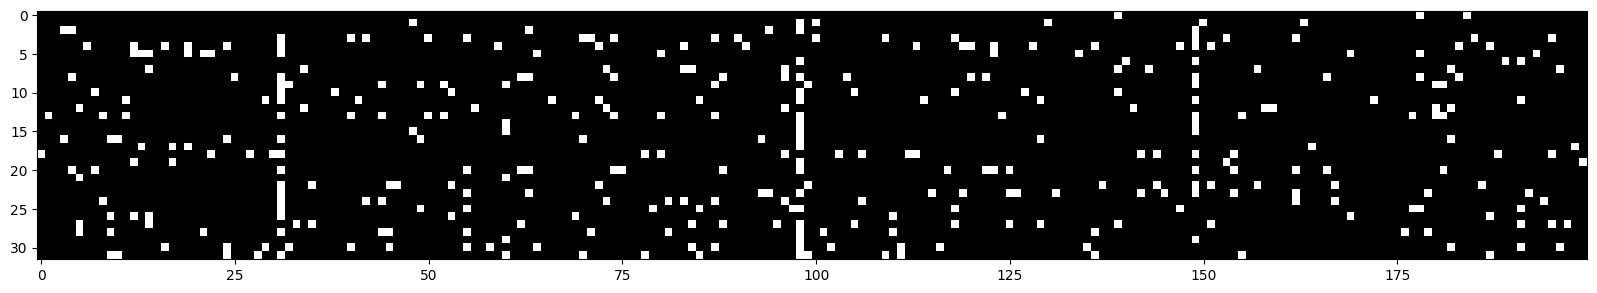

In [191]:
plt.figure(figsize=(20,10))
plt.imshow(h.abs()>0.99, cmap = 'gray', interpolation='nearest'); # the more the white the deader the neuron

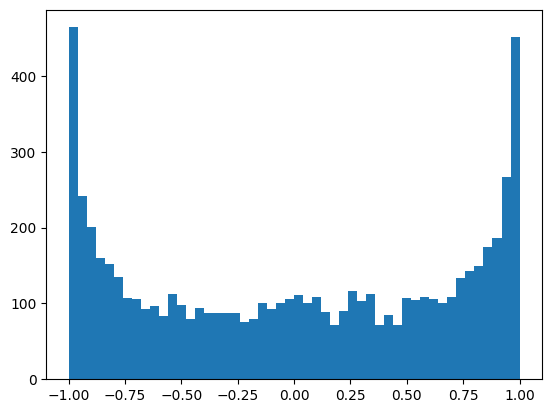

In [192]:
plt.hist(h.view(-1).tolist(), bins=50); # -1 and 1 values very bad => grad = 0

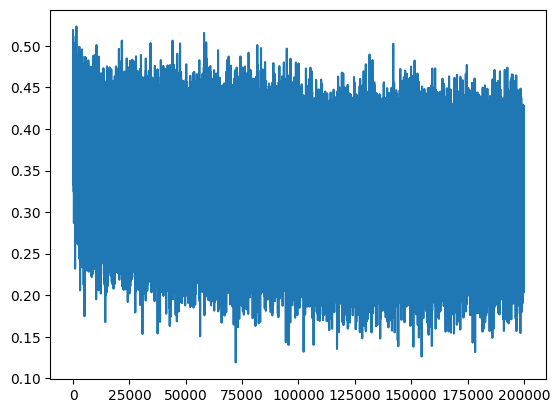

In [193]:
plt.plot(stepi, lossi)

In [214]:
# we dont need this anymore as bnmean_running and bnstd_running are already calculated and pretty close

with torch.no_grad():
    emb = C[Xtr]
    embcat = emb.view((emb.shape[0], -1))
    hpreact = embcat @ W1 + b1
    # measure mean and std over entire training set
    bnmean = hpreact.mean(0, keepdim=True)
    bnstd = hpreact.std(0, keepdim=True)

In [211]:
def split_loss(split):
    if split == 'train':
        data = Xtr
        labels = Ytr
    elif split == 'test':
        data = Xtest
        labels = Ytest
    elif split == 'val':
        data = Xdev
        labels = Ydev
    else:
        raise ValueError("Invalid split value. Choose from 'train', 'test', or 'val'.")

    with torch.no_grad(): # disable grad tracking
        emb = C[data]
        embcat = emb.view((emb.shape[0], -1))
        hpreact = embcat @ W1 + b1
        hpreact = bngain * (hpreact - bnmean_running) / bnstd_running + bnbias
        h = torch.tanh(hpreact)
        logits = h @ W2 + b2
        loss = F.cross_entropy(logits, labels)

    print(split, loss.item())

split_loss("train")
split_loss("val")


train 2.0668091773986816
val 2.1186435222625732


split data into train, dev (validation), test

80%, 10%, 10%

train for training duh

dev for size of emb and size of nn

test for evaluating performance

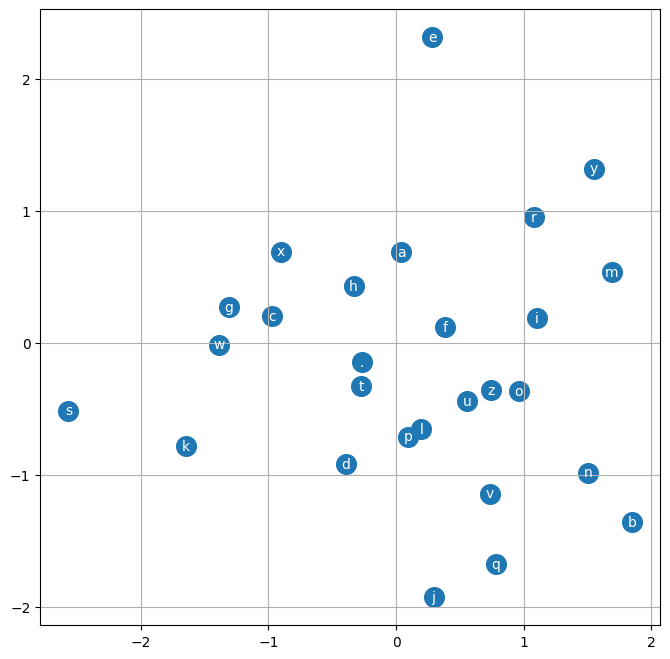

In [162]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')


In [1079]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [1080]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
amelle.
khi.
milia.
aty.
halaysleem.
hubnalee.
rhy.
kaeli.
nellara.
chaiiv.
kaleigh.
ham.
ford.
quinton.
lilea.
jadiq.
wateloginarynn.
frae.
pirsabeed.


x mean: -0.01598844677209854, x std: 1.007297396659851
y mean: 0.0016881849151104689, y std: 1.0226424932479858


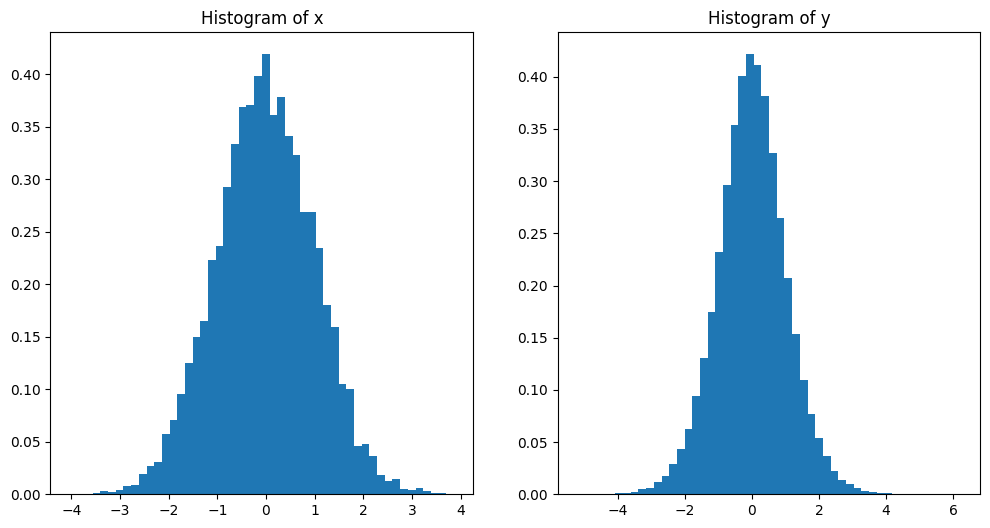

In [167]:
x = torch.randn((1000, 10))
w = torch.randn((10, 200)) / 10**0.5 # magic number sqrt(input)
# we use sqrt(2/n_i) for ReLU as it throws half the distribution
y = x @ w
print(f"x mean: {x.mean().item()}, x std: {x.std().item()}")
print(f"y mean: {y.mean().item()}, y std: {y.std().item()}")
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(x.view(-1).tolist(), bins=50, density=True)
plt.title('Histogram of x')
plt.subplot(1, 2, 2)
plt.hist(y.view(-1).tolist(), bins=50, density=True)
plt.title('Histogram of y')
plt.show()
